## Cargar los datos

In [11]:
import pandas as pd

file_path = 'traffic_simulation_data_with.csv' 
df = pd.read_csv(file_path)


df = df.drop(columns=['Unnamed: 0'])
 
# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()
df

,cars_semaphore_delay,cars_delay,walker_semaphore_delay,walkers_delay
0,1.42,20.12,1.88,9.11
1,2.54,16.92,2.07,13.26
2,1.99,17.53,2.44,21.81
3,2.16,30.95,1.64,9.62
4,2.06,24.51,2.65,14.68
...,...,...,...,...
395,1.00,22.44,1.68,12.20
396,3.16,30.41,1.20,12.15
397,1.76,29.05,1.67,20.27
398,-0.55,27.96,1.93,16.45


In [12]:
import pandas as pd

pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

,cars_semaphore_delay,cars_delay,walker_semaphore_delay,walkers_delay
count,400.000,400.000,400.000,400.000
mean,1.964,24.975,1.994,15.043
std,1.031,3.979,0.419,4.125
min,-1.360,13.270,0.960,2.530
25%,1.298,22.330,1.700,12.480
50%,1.900,25.135,1.980,15.120
75%,2.643,27.385,2.260,17.582
max,6.210,36.350,3.350,27.160


## Mostrar histograma con los datos

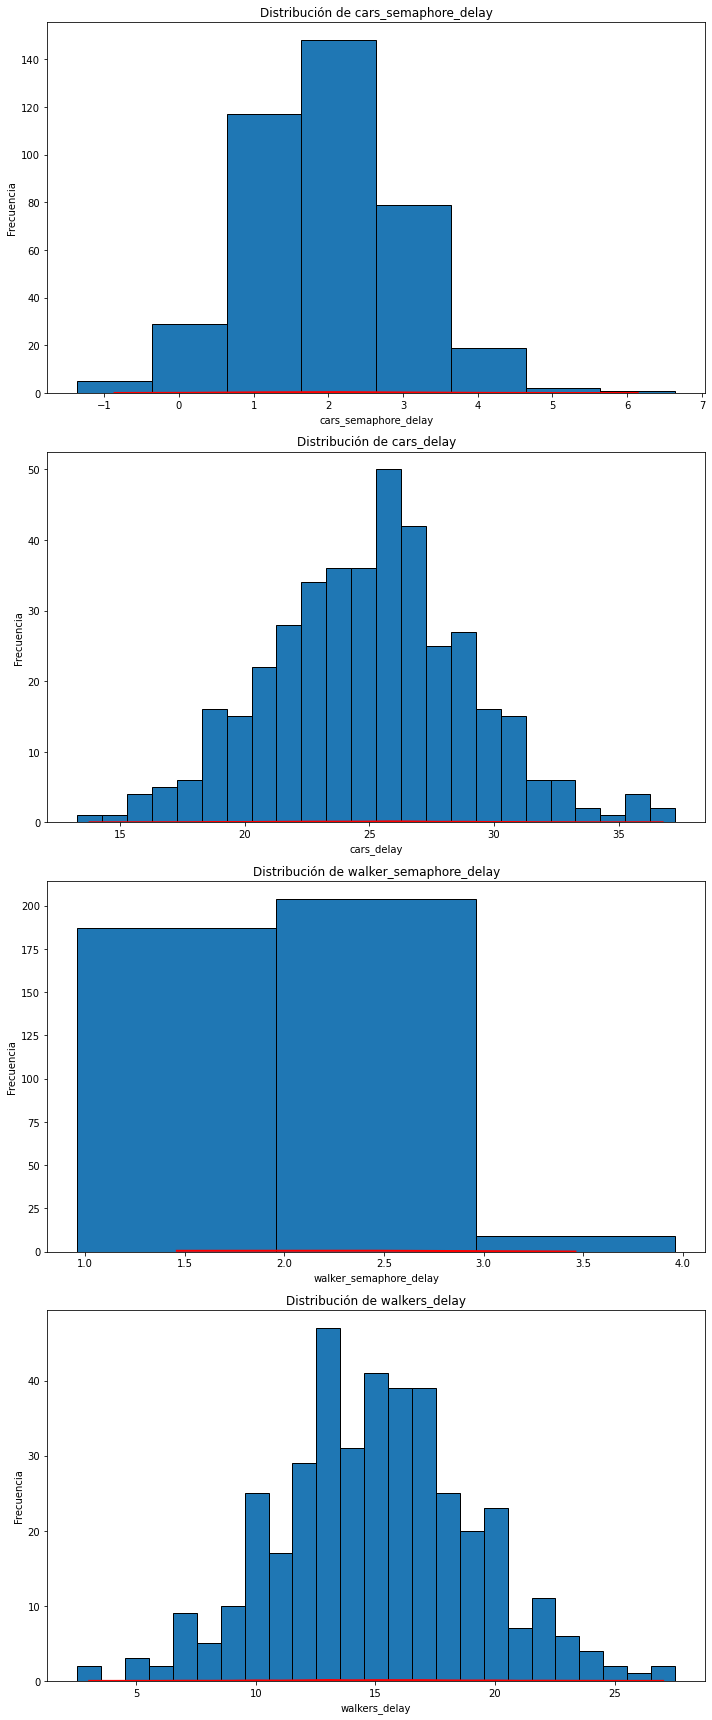

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have your DataFrame loaded as 'df'

fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, 6*len(df.columns)))

for i, column in enumerate(df.columns):
    values = df[column].values.flatten()  # Flatten the array
    n, bins, patches = axes[i].hist(values, bins=np.arange(min(values), max(values)+1, 1), edgecolor='black')
    
    # Add a kernel density estimation
    density = np.histogram(values, bins=bins, density=True)[0]
    axes[i].plot((bins[:-1] + bins[1:]) / 2, density, 'r-', linewidth=2)
    
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# If you want to save the plots as separate figures
for i, column in enumerate(df.columns):
    fig, ax = plt.subplots(figsize=(10, 6))
    values = df[column].values.flatten()
    n, bins, patches = ax.hist(values, bins=np.arange(min(values), max(values)+1, 1), edgecolor='black')
    
    # Add a kernel density estimation
    density = np.histogram(values, bins=bins, density=True)[0]
    ax.plot((bins[:-1] + bins[1:]) / 2, density, 'r-', linewidth=2)
    
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    
    # plt.savefig(f'{column}_distribution.png')
    plt.close(fig)

Como podemos apreciar, ninguna de nuestras variables tiene un comportamiento normal

## Análisis de normalidad

In [14]:
for x in df.columns:
    print(f"El kurtosis de {x} es {df[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df[x].skew()}")

El kurtosis de cars_semaphore_delay es 0.8831485726401289
La Asimetría de cars_semaphore_delay es 0.16662705841870676
El kurtosis de cars_delay es 0.16352694365346077
La Asimetría de cars_delay es 0.08954672781133943
El kurtosis de walker_semaphore_delay es 0.03772899320242962
La Asimetría de walker_semaphore_delay es 0.2478077531836169
El kurtosis de walkers_delay es 0.20886375598587126
La Asimetría de walkers_delay es 0.05321183644031733


### Test de Normalidad

In [15]:
from scipy.stats import kstest, shapiro


for x in df.columns:
    test = df[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

cars_semaphore_delay
D = 0.6776903456440608
p-value = 5.209801239592065e-46

cars_delay
D = 1.0
p-value = 0.0

walker_semaphore_delay
D = 0.874902082204761
p-value = 1.266483776729844e-90

walkers_delay
D = 0.9986051127645078
p-value = 5.687743530918396e-286



## Matriz de Correlación

Mediante la matriz de correlación veremos la relación entre las variables y nos dará una idea de las variables a seleccionar

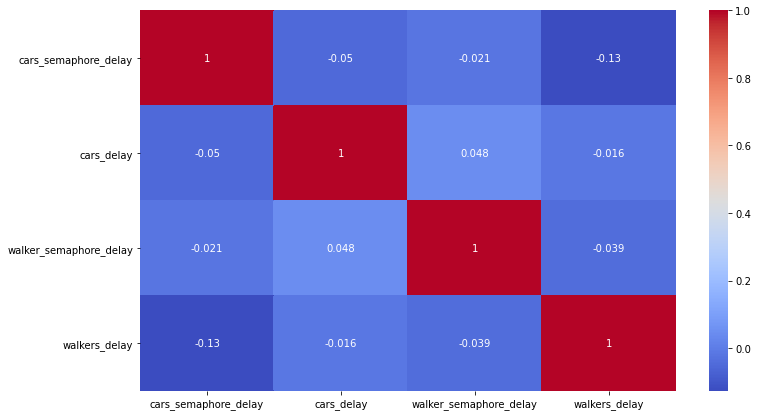

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
# print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
